neural network


**`Roll no : 21k-3002
`**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.neural_network import MLPClassifier


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/colab/Agrofood_co2_emission.csv')

In [7]:
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [12]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(6965, 31)
Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                      

In [13]:
df.isnull().sum()

,0
Area,0
Year,0
Savanna fires,31
Forest fires,93
Crop Residues,1389
Rice Cultivation,0
Drained organic soils (CO2),0
Pesticides Manufacturing,0
Food Transport,0
Forestland,493


In [18]:
# df.fillna(df.mean())
# Instead of using df.mean() directly, selecting only numeric columns, because df.mean not working...
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [19]:
#df.replace(np.nan , df.mean(), inplace = True)

In [20]:
df.duplicated().sum()

0

<Axes: xlabel='Year'>

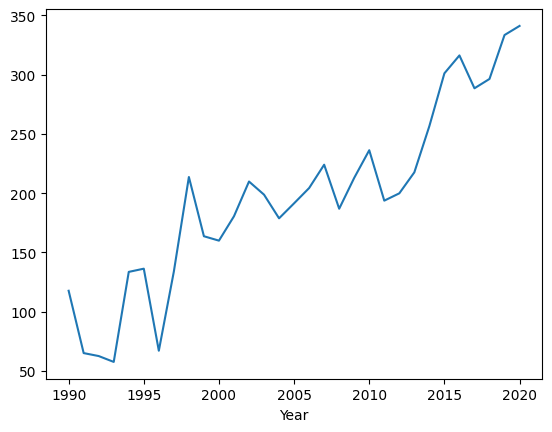

In [21]:
df.groupby('Year')['Average Temperature °C'].sum().plot()

In [30]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [31]:
x=df.drop('Average Temperature °C',axis=1)
y=df['Average Temperature °C']

In [42]:
if y.nunique() > 2:  # Multi-class classification...
    y = to_categorical(y)
elif y.nunique() == 2:  # Binary classification...
    y = LabelEncoder().fit_transform(y)


In [43]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
x_test=ss.transform(x_test)

neural network


In [46]:
model=Sequential()

model.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))

model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(y_train.shape[1] if len(y.shape)>1 else 1,activation='softmax' if len(y.shape)>1 else 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' if len(y.shape)>1 else 'binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5888 - loss: 1.0816 - val_accuracy: 0.7168 - val_loss: 0.6764
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6678 - loss: 0.7487 - val_accuracy: 0.7366 - val_loss: 0.6583
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6753 - loss: 0.7178 - val_accuracy: 0.7276 - val_loss: 0.6485
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6874 - loss: 0.6964 - val_accuracy: 0.7168 - val_loss: 0.6401
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7003 - loss: 0.6608 - val_accuracy: 0.7079 - val_loss: 0.6454
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - loss: 0.6694 - val_accuracy: 0.7204 - val_loss: 0.6317
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6934 - loss: 0.6640 - val_accuracy: 0.7348 - val_loss: 0.6233
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7140 - loss: 0.6496 - val_accuracy: 0.

In [49]:
train_loss,train_acc=model.evaluate(X_train,y_train,verbose=0)

test_loss,test_acc=model.evaluate(X_train,y_train,verbose=0)

In [50]:
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 0.75
Testing Accuracy: 0.75


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.75


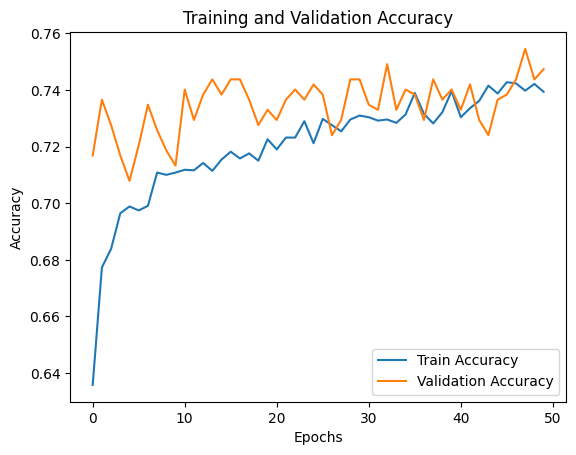

In [52]:
y_pred = model.predict(x_test)
if len(y.shape) == 1:  # For regression or binary classification...
    y_pred = (y_pred > 0.5).astype(int)

# Evaluate the predictions...
if len(y.shape) == 1:
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
else:
    print(f"Accuracy: {accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)):.2f}")

# Plotting the learning curve...
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


mlp